In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [20]:
df = pd.read_csv("../assets/datasets/votes.csv")

In [21]:
df.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [22]:
del df["Unnamed: 0"]
y = df["Class"]
del df["Class"]

In [23]:
for col in df.columns:
    new = [-1 if (i=="n") else 1 if (i=="y") else 0 for i in df[col]]
    df[col] = new

In [25]:
df["Class"] = y

In [26]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,republican
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,republican
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,democrat
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,democrat
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,democrat


Next, let's define the x and y variables: 

In [27]:
df.to_csv("votes_corrected.csv")

In [28]:
del df["Class"]

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [29]:
x = df.ix[:,0:16].values


In [31]:
xs = StandardScaler().fit_transform(x)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [32]:
cov_mat = np.cov(xs.T)

In [33]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

Now, let's check the eigenvalues: 

In [34]:
eig_val

array([ 7.41941927,  1.43046958,  1.13360175,  0.86493939,  0.80421642,
        0.75270164,  0.13339919,  0.21590379,  0.24093066,  0.57627688,
        0.30600181,  0.33179831,  0.5265407 ,  0.47299703,  0.39372229,
        0.43394765])

And the eigenvectors: 

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [37]:
total_eigen = sum(eig_val)
varExpl = [(i/total_eigen)*100 for i in sorted(eig_val, reverse=True)]
cum_var = np.cumsum(varExpl)

Now, calculate the explained variance and the Cumulative explained variance

In [38]:
cum_var

array([  46.26476956,   55.1846517 ,   62.25337526,   67.64681919,
         72.66161699,   77.35518756,   80.94863821,   84.23195232,
         87.18138785,   89.8873258 ,   92.34243322,   94.41140546,
         96.31952017,   97.82187513,   99.16817174,  100.        ])

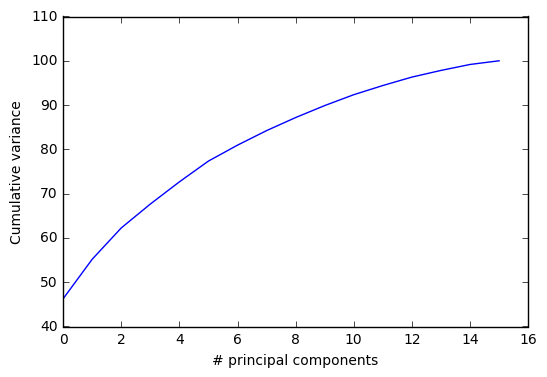

In [68]:
plt.ylabel("Cumulative variance")
plt.xlabel("# principal components")
plt.plot(cum_var)
plt.show()

Now, conduct the PCA using scikit learn

In [92]:
k = 5

In [93]:
pcask = PCA(n_components = k)
pca_sk = pcask.fit_transform(xs)

In [94]:
len(pca_sk)

435

In [95]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

In [96]:
model.fit(pca_sk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
labels = model.labels_

In [98]:
y_num = [1 if i == "republican" else 0 for i in y]

In [99]:
y_act = np.array(y_num)

In [100]:
y_act.dot(labels)/np.sqrt((y_act.dot(y_act))*(labels.dot(labels)))

0.86196066643216995

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(y_num, labels)

array([[225,  42],
       [ 10, 158]])

In [ ]:
n = 5, array([[225,  42],
       [ 10, 158]]), cor = 0.86

In [34]:
n= 10, array([[225,  42],
       [ 10, 158]]), cor = 0.86

In [36]:
n = 17, array([[225,  42],
       [ 10, 158]]) cor = 0.866

Then, standardize the x variable for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants